### Develop a predictive model to forecast customer purchasing behavior based on their history and demographic data. 

In [1]:
## Our standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
def evaluate_regression(model, X_train,y_train, X_test, y_test): 
    """Evaluates a scikit learn regression model using r-squared and RMSE"""
    
    ## Training Data
    y_pred_train = model.predict(X_train)
    r2_train = metrics.r2_score(y_train, y_pred_train)
    rmse_train = metrics.mean_squared_error(y_train, y_pred_train, 
                                            squared=False)
    
    print(f"Training Data:\tR^2= {r2_train:.2f}\tRMSE= {rmse_train:.2f}")
        
    
    ## Test Data
    y_pred_test = model.predict(X_test)
    r2_test = metrics.r2_score(y_test, y_pred_test)
    rmse_test = metrics.mean_squared_error(y_test, y_pred_test, 
                                            squared=False)
    
    print(f"Test Data:\tR^2= {r2_test:.2f}\tRMSE= {rmse_test:.2f}")

## Load the data and initial EDA

In [3]:
# Reload the CSV file 
file_path_trends = 'shopping_trends.csv'
file_path_behavior = 'shopping_behavior_updated.csv'

# reading the data from the files
df_shopping_behavior = pd.read_csv(file_path_behavior)
df_shopping_trends = pd.read_csv(file_path_trends)

# displaying the first rows of the two datas
df_shopping_trends.head()
df_shopping_behavior.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [4]:
# summarize the dataset
df_shopping_behavior.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


### Handling Missing Values

In [5]:
# check for missing values
print(df_shopping_behavior.isnull().sum())

# drop duplicates
df_shopping_behavior = df_shopping_behavior.drop_duplicates()

df_shopping_behavior.head()


Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [6]:
# check for missing values
print(df_shopping_trends.isnull().sum())

# drop duplicates
df_shopping_trends = df_shopping_trends.drop_duplicates()

df_shopping_trends.head()

Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


### Exploratory Data Analysis

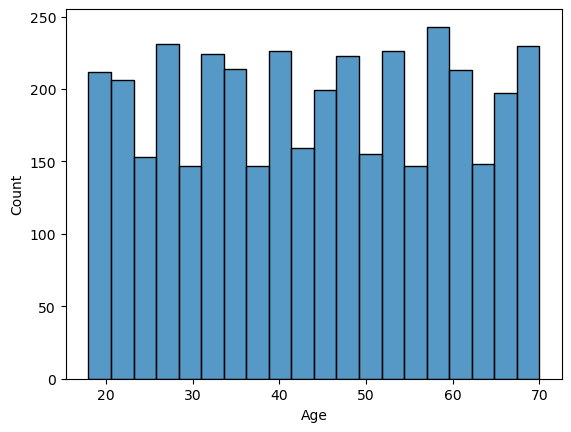

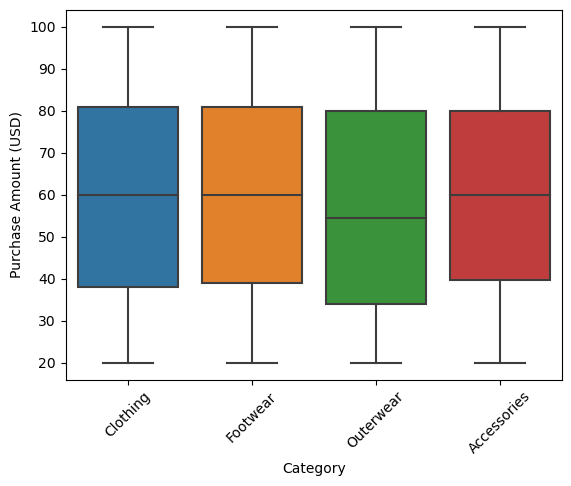

/var/folders/mm/04nbg7g95pgdtd1s3081zgfh0000gn/T/ipykernel_1105/2779460716.py:14: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_shopping_behavior.corr(), annot=True, fmt=".2f")


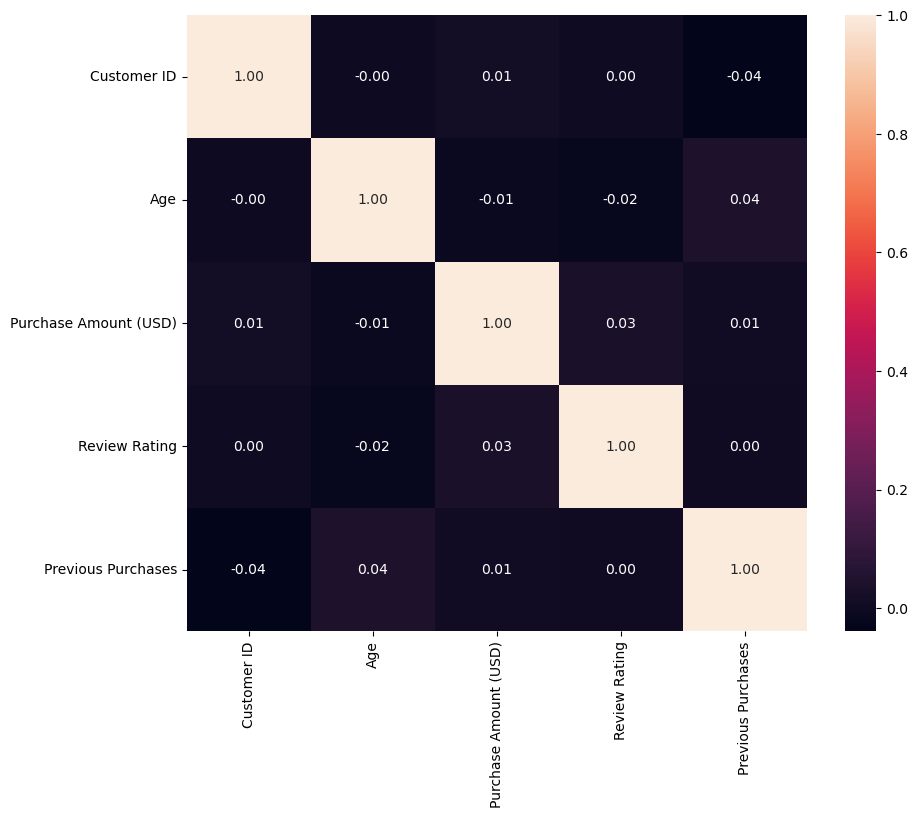

In [7]:
df_shopping_behavior.describe()

# distribution of key variables 
sns.histplot(data=df_shopping_behavior, x='Age', bins=20)
plt.show()

# Purchase amount by category
sns.boxplot(data=df_shopping_behavior, x='Category', y='Purchase Amount (USD)')
plt.xticks(rotation=45)
plt.show()

# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df_shopping_behavior.corr(), annot=True, fmt=".2f")
plt.show()


In [8]:
# initial visualization and analysis


# For 'Gender'
print(df_shopping_behavior['Gender'].value_counts())

# For 'Category'
print(df_shopping_behavior['Category'].value_counts())

Male      2652
Female    1248
Name: Gender, dtype: int64
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: Category, dtype: int64


In [9]:
print(df_shopping_behavior['Purchase Amount (USD)'].describe())


count    3900.000000
mean       59.764359
std        23.685392
min        20.000000
25%        39.000000
50%        60.000000
75%        81.000000
max       100.000000
Name: Purchase Amount (USD), dtype: float64


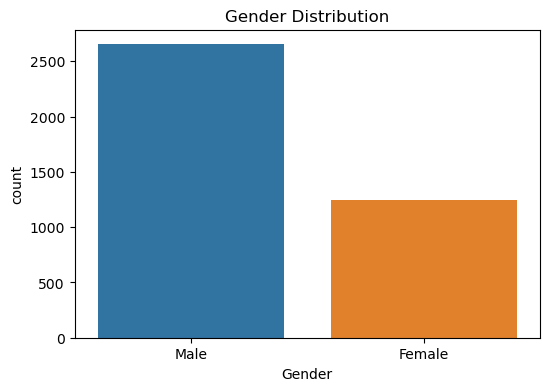

In [10]:
# Gender distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df_shopping_behavior, x='Gender')
plt.title('Gender Distribution')
plt.show()

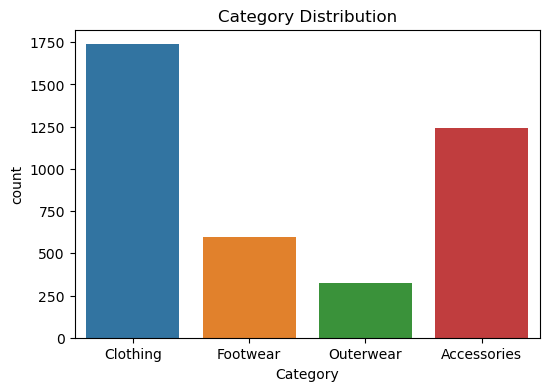

In [11]:
# Category distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df_shopping_behavior, x='Category')
plt.title('Category Distribution')
plt.show()

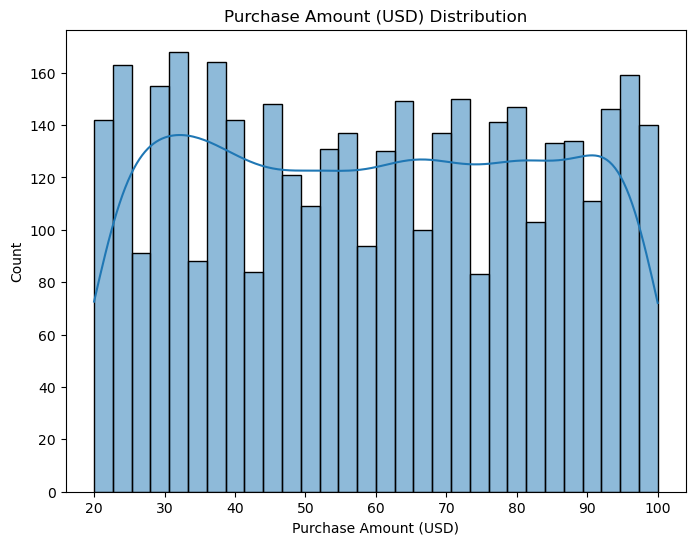

In [12]:
# Purchase Amount distribution
plt.figure(figsize=(8,6))
sns.histplot(data=df_shopping_behavior, x='Purchase Amount (USD)', bins=30, kde=True)
plt.title('Purchase Amount (USD) Distribution')
plt.show()

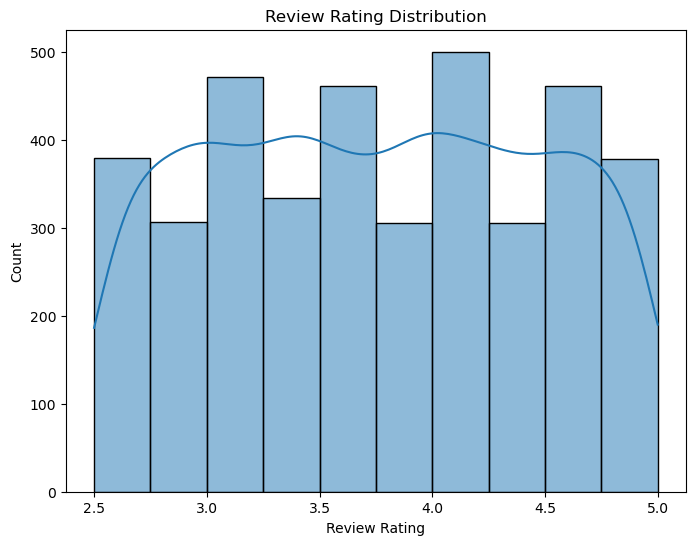

In [13]:
# Review Rating Distribution
plt.figure(figsize=(8,6))
sns.histplot(data=df_shopping_behavior, x='Review Rating', bins=10, kde=True)
plt.title('Review Rating Distribution')
plt.show()

### Feature Selection and Preprocessing

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer 
from sklearn.pipeline import Pipeline

# selecting features and target variable 
X = df_shopping_behavior.drop(['Purchase Amount (USD)', 'Item Purchased'], axis=1)
y = df_shopping_behavior['Purchase Amount (USD)']

# Splitting dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# preprocessing 
# encoding categorical variables and scaling numerical variables
num_features = X.select_dtypes(include=['int64', 'float64']).columns
cat_features = X.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(), cat_features)
    ])

### Model Building

In [23]:
def classification_metrics(model, x_test,y_test,label='Test Data',
                           figsize=(15,5), normalize='true',
                           cmap='Greens'):
    fig, axes = plt.subplots(1,2, figsize=figsize)
    
    # get the predictions
    y_pred = model.predict(X_test)
    
    #Print the classification report for the test data
    print('---'*20)
    print(f'[1] CLASSIFICATION REPORT FOR: {label}')
    print('---'*20)

    print(classification_report(y_test,y_pred))

    ConfusionMatrixDisplay.from_predictions(y_test,y_pred,
                                            normalize=normalize, cmap=cmap,
                                            ax=axes[0])
    
    RocCurveDisplay.from_estimator(model, X_test,y_test,
                                   ax=axes[1])
    plt.show()

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, mean_absolute_error
from sklearn.pipeline import make_pipeline



# creating a model pipeline
model = make_pipeline(preprocessor, LinearRegression())

# fitting the model
model.fit(X_train,y_train)

# predicting on test set
y_pred = model.predict(X_test)
y_pred[:10]


array([62.1595016 , 59.44320937, 60.94494804, 59.31103234, 62.84039848,
       54.89283391, 54.68539283, 63.74173249, 61.62768222, 61.26205239])

In [36]:
# Assuming y_pred is your model's predictions and y_test are the true values
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Absolute Error: 20.78962816843944
Mean Squared Error: 571.7216770343625
R^2 Score: -0.02169350903702294


## Analysis Context

This context Predictive Analytics for Purchase Behavior, where the goal is to develop a model that forecasts customer purchasing behavior based on history and demographic data. 

A. Mean Absolute Error (MAE)
- Represents the average absolute difference between the actual and predicted values. In this analysis, it indicates that, on average, the model's predictions deviate from the actual purchase amounts by approximately 20.79 units (currency, items, etc., depending on the measurement). 

B. Mean Squared Error (MSE)
-  Similar but squares the differences before averaging them. This has the effect of heavily penalizing larger errors. In this context, A lower MSE indicates that the model makes fewer large errors in predicting purchase amounts. Because MSE is sensitive to large errors (due to squaring), a model with a low MSE is particularly good at avoiding large mistakes in forecast amounts, making it reliable for making financial forecasts and budgeting.

C. R-Squared
- a statistical measure that represents the proportion of the variance for the dependent variable that's explained by the independent variables in the model. In this context,the R² score, being negative, suggests that the model fails to accurately predict purchasing behavior based on the provided data.

## Improving the model



In [39]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Encoding categorical variables and scaling numerical variables
num_features = X.select_dtypes(include=['int64', 'float64']).columns
cat_features = X.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(), cat_features)
    ])

# Define the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', Ridge())])

# Define a range of alpha values for Ridge Regression
parameters = {'regressor__alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}

# Use GridSearchCV to find the best alpha
ridge_regressor = GridSearchCV(pipeline, parameters, scoring='neg_mean_squared_error', cv=5)

# Fit the model using the pipeline
ridge_regressor.fit(X_train, y_train)

# Output the best parameters and the corresponding score
print("Best parameters:", ridge_regressor.best_params_)
print("Best score:", ridge_regressor.best_score_)


Best parameters: {'regressor__alpha': 20}
Best score: -573.8621911575352


In [40]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# Redefine the parameters with a higher range of alpha values
parameters = {'regressor__alpha': [20, 50, 100, 200, 500, 1000]}

# Use GridSearchCV with the new range of alpha values
ridge_regressor = GridSearchCV(pipeline, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(X_train, y_train)

# Output the best parameters and the corresponding score
best_alpha = ridge_regressor.best_params_['regressor__alpha']
best_score = ridge_regressor.best_score_

# Calculate RMSE from the best score (which is a negated MSE)
rmse = sqrt(-best_score)

print("Best alpha:", best_alpha)
print("RMSE:", rmse)

Best alpha: 1000
RMSE: 23.6855339978681


### Updated Evaluations 
1. The new alpha value 1000 indicates stronger Regularization to the model. It helps prevent overfitting by penalizing large coefficients, essentially simplifying the model by reducing its complexity.
2. An RMSE of 23.6855 suggests that, on average, the model's predictions deviate from the actual purchase amounts by approximately 23.69 units of your target variable's measurement (e.g., dollars, if you're predicting purchase amounts in USD).
- RMSE value provides a straightforward metric for comparing the performance of different predictive models on the same task. 
- If the model was used to forecast demand for inventory management, an average error of approximately 23.69 might influence stock levels, potentially affecting inventory costs, storage, and availability.